Un système d'équations différentielles ordinaires (ODE) comme ci-dessus, ainsi que quelques conditions initiales (valeurs des variables du modèle au moment de démarrage initial, disons t=0 ), constituent un problème de valeur initiale, ou IVP. Les IVP sont omniprésents dans les systèmes de modélisation qui évoluent dans le temps. Ils encapsulent comment un état futur d'un système est déterminé par l'état présent (les données initiales) ainsi que certaines règles sur l'évolution des quantités (les ODE).
en consèdre :
# s=S/N,
# e=E/N,
# i=I/N,
# r=R/N.
Le système EDO équivalent à résoudre pour les fonctions inconnues s(t), e(t), i(t) et r(t),
est maintenant devenu:
# ds/dt=−βis
# de/dt =βis−σe
# di/dt=σe−γi
# dr/dt=γi.


In [1]:
# les conditions intials
# S(0)=0.99
# E(0)=0.01
# I(0)=0
# R(0)=0 


In [78]:
# Résoudre l'IVP(itnital valeur probleme) à l'aide du module scipy
from scipy.integrate import solve_ivp
import numpy as np

# implmenter la fonction SEIR
def seir_f(t , y ,beta ,sigma  ,gamma):
    s, e, i, r = y
    return np.array([-beta * i * s,
                    -sigma * e + beta * i * s,
                     -gamma * i + sigma * e,
                     gamma * i])

In [12]:
 # essayer quelques valeurs de paramètres
 beta = 1     #  la probabilité d'infection
 sigma = 1    #  Le taux d'incubation
 gamma = 0.1  # Le taux de récupération

In [13]:
sol = solve_ivp(seir_f, [0, 60], [0.99, 0.01, 0, 0], 
                rtol=1e-6, args=(beta, sigma, gamma))

Text(0, 0.5, 'POPUPLATION')

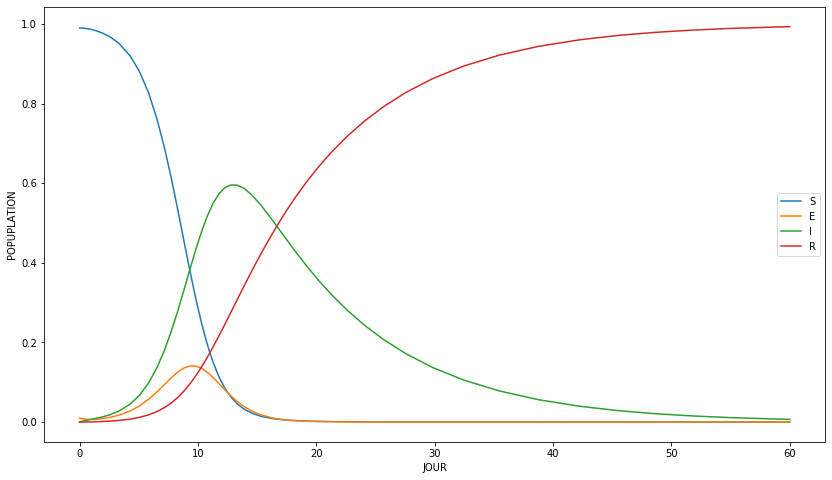

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,8))
ax = fig.gca()
curves = ax.plot(sol.t, sol.y.T)
ax.legend(curves, ['S', 'E', 'I', 'R'])
plt.xlabel('JOUR')
plt.ylabel('POPUPLATION')

 # Comme vous pouvez le voir, même avec 1% de la  population exposée, le nombre d'infections augmente rapidement. Cependant, avec plus de temps, ils commencent à baisser.

Etude des paramètres:
Avoir une fonction pour calculer et tracer E(exposer) et I(infection) permet d'étudier facilement les variations de solutions par rapport aux trois paramètres.
Créons une telle fonction en rassemblant les étapes précédentes.

In [34]:
def plot_ei(beta=1,sigma=1,gamma=0.1,s0=0.99,e0=0.01,i0=0,r0=0,t0=60):
    # appliquer le solveur ODE (l'équations différentielles ordinaires)
    sol = solve_ivp(seir_f, [0, t0], [s0,e0,i0,r0],
                rtol=1e-6, args=(beta, sigma, gamma))
    # tracer les composants I et E
    fig = plt.figure(figsize=(12,6) ); ax = fig.gca()
    ax.plot(sol.t, sol.y[1, :].T, color='brown',
            linestyle='dashed', label='Exposé(e)')
    ax.plot(sol.t, sol.y[2, :].T, color='red', label='Infecté')
    ax.legend()
    return ax
    
    

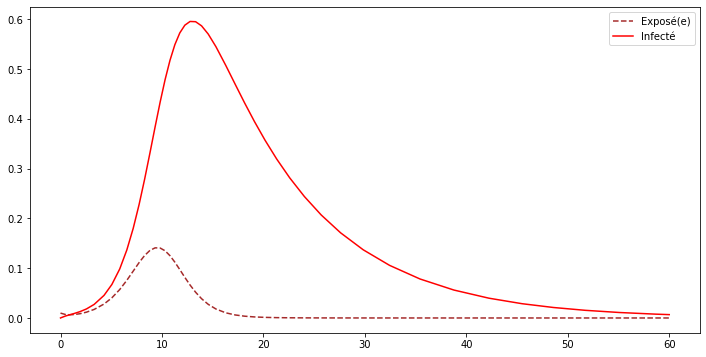

In [35]:
plot_ei() # les paramètres par défaut ci-dessus

In [28]:
sol.y[1,:].T

array([1.00000000e-02, 9.42334418e-03, 7.00307432e-03, 6.39459166e-03,
       6.92000519e-03, 8.56726923e-03, 1.16552273e-02, 1.71558309e-02,
       2.79842363e-02, 4.04968889e-02, 5.71297961e-02, 7.55706581e-02,
       9.40939735e-02, 1.11259825e-01, 1.25597322e-01, 1.35784378e-01,
       1.40872348e-01, 1.40491680e-01, 1.34938628e-01, 1.25068154e-01,
       1.12062470e-01, 9.71760971e-02, 8.15567646e-02, 6.61558554e-02,
       5.16998967e-02, 3.86930394e-02, 2.74285281e-02, 1.79959351e-02,
       1.03484920e-02, 6.02635650e-03, 3.57865075e-03, 2.09595111e-03,
       1.20661691e-03, 6.82304019e-04, 3.79653642e-04, 2.08501588e-04,
       1.13415281e-04, 6.13310297e-05, 3.31253603e-05, 1.80249774e-05,
       1.01015355e-05, 6.17209831e-06, 4.37730019e-06, 3.21396925e-06,
       2.17145289e-06, 1.52984796e-06, 1.33250009e-06, 1.52772041e-06,
       6.56549443e-07])

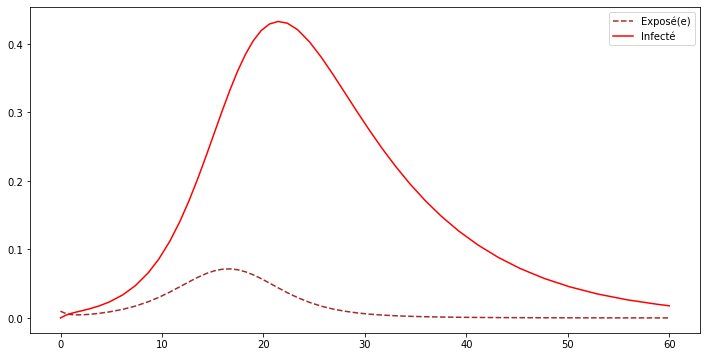

In [36]:
#  que se passe-t-il si la bêta est réduite ?
plot_ei(beta=0.5)

 quand on reduit la beta le nombre des infectés se sera diminu, 
 on appliquant les mesures de sécurité ( la distance social,port le mask ,vaccin ...) la beta diminu.

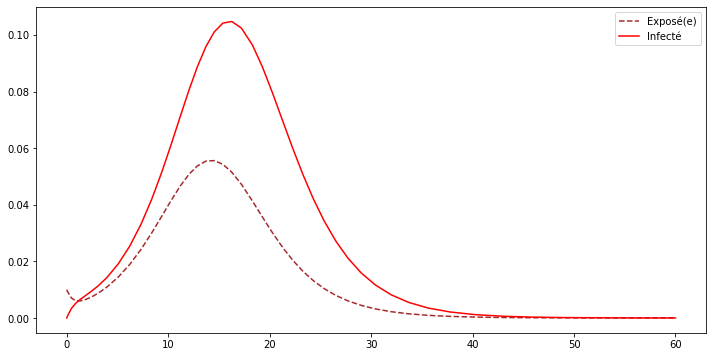

In [37]:
# que se passe-t-il si gamma est augmenté ?
plot_ei(gamma=0.5)

l'augmentation de gamma engendre une augmentation des exposées et les infectes 

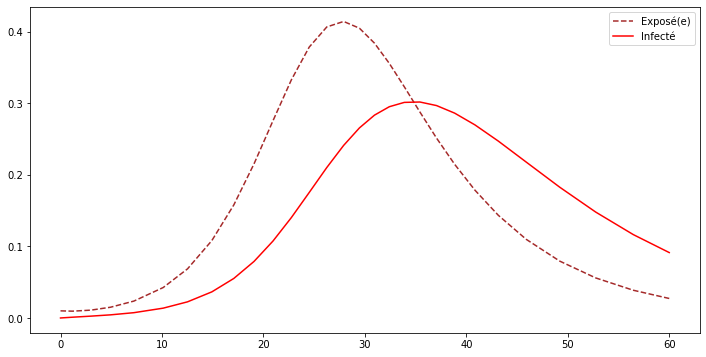

In [40]:
# # quel est l'effet de sigma ?
plot_ei(sigma=0.1)

la diminution de incubation implique l'augmentation des exposees et diminution des infectes

# a l'occasion de aïd adha, supposons que notre modèle représente la population d'une ville et supposons que les déplacements vers et hors de la ville soient autorisés. Ensuite, il faut ajouter des termes qui représentent l'afflux de voyageurs dans chaque catégorie (le nombre de personnes entrant moins le nombre de personnes sortant). Même si nous supposons que les personnes infectées ne voyagent pas, un petit afflux dans la catégorie sensible S et la catégorie exposée E perturbera l'équilibre sans maladie de notre modèle. Ajoutons les termes a et b représentant ces influx et voyons ce qui se passe:

In [46]:
def seir_f2(t, y, beta, sigma, gamma, a, b):
    s, e, i, r = y
    return np.array([-beta * i * s + a,
                     -sigma * e + beta * i * s  + b, 
                     -gamma * i + sigma * e, 
                     gamma * i - (a + b)])
def plot_ei2(beta=1, sigma=1, gamma=0.1, a=0.005, b=0.001, t1=150):
    sol = solve_ivp(seir_f2, [0, t1], [0.99, 0.01, 0, 0], rtol=1e-7,
                    args=(beta, sigma, gamma, a, b))
    fig = plt.figure(figsize=(12,8)); ax = fig.gca()
    ax.plot(sol.t, sol.y[1, :].T, color='brown', linestyle='dashed', label='Exposed')
    ax.plot(sol.t, sol.y[2, :].T, color='red', label='Infected')
    plt.xlabel('Jour')
    plt.ylabel('Population')
    ax.legend()


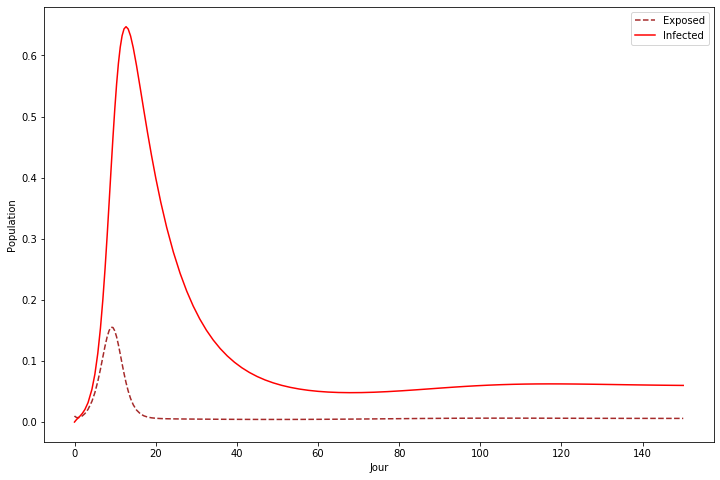

In [47]:
plot_ei2(a=0.005,b=0.001) 

Comme vous pouvez le voir à partir de cette sortie, le pourcentage de la population atteinte de la maladie reste désormais autour de 5% et ne disparaît jamais tout à fait, un exemple d'équilibre endémique.

In [73]:
def seir_f2(t, y, beta, sigma, gamma, a, b,mask):
    s, e, i, r = y
    return np.array([-beta * i * s + a -mask,
                     -sigma * e + beta * i * s  + b, 
                     -gamma * i + sigma * e , 
                     gamma * i - (a + b )])
def plot_ei2(beta=1, sigma=1, gamma=0.1, a=0.005, b=0.001,mask=0, t1=150):
    sol = solve_ivp(seir_f2, [0, t1], [0.99, 0.01, 0, 0], rtol=1e-7,
                    args=(beta, sigma, gamma, a, b,mask))
    fig = plt.figure(figsize=(12,8)); ax = fig.gca()
    ax.plot(sol.t, sol.y[1, :].T, color='brown', linestyle='dashed', label='Exposed')
    ax.plot(sol.t, sol.y[2, :].T, color='red', label='Infected')
    plt.xlabel('Jour')
    plt.ylabel('Population')
    ax.legend()

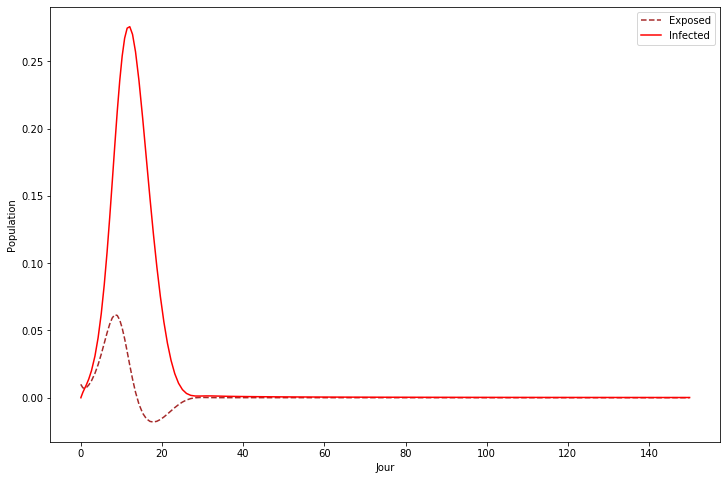

In [74]:
plot_ei2(a=0.005,b=0.001,mask=0.05)

# L'émergence du R0:
# R0=β/γs0
qui est le nombre reproducteur de base pour ce modèle. Dans certains documents , R0 est défini (pour correspondre à la définition épidémiologique) à partir d'une population initiale 100 % sensible, auquel cas s0=1 et R0=β/γ.


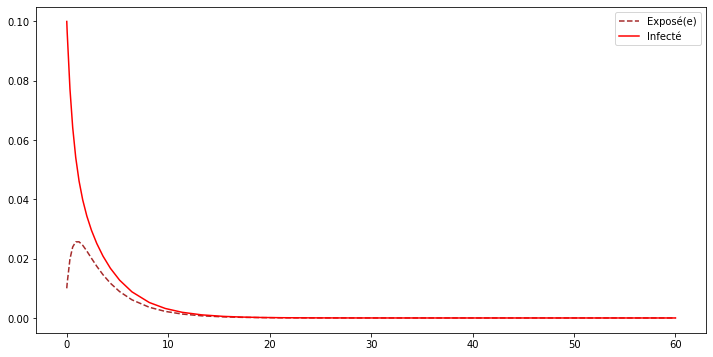

In [75]:
# L'effet de R0:
# Voici un exemple où R0=βs0/γ<1. =====> R0 = beta*s0/gamma
plot_ei(beta=0.6, gamma=1, s0=0.9, i0=0.1) 

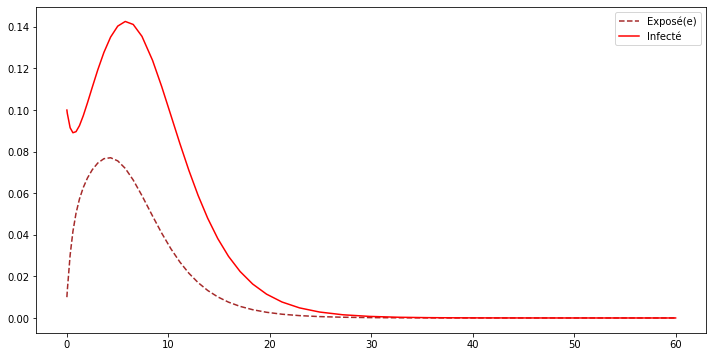

In [76]:
# Voici un exemple où R0=βs0/γ >1. =====> R0 = beta*s0/gamma
plot_ei(beta=1, gamma=0.5, s0=0.9, i0=0.1)